<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here

df=df.dropna(subset=[ 'JobSat', 'RemoteWork'], axis=0)
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

Employment    0
JobSat        0
RemoteWork    0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_426/2631872998.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_jobsat= df.groupby('Experience_ranges')['JobSat'].mean().reset_index()


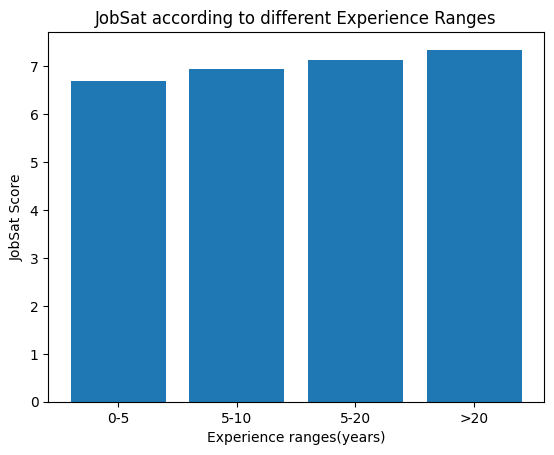

In [5]:
## Write your code here
df=df.dropna(subset=['YearsCodePro', 'JobSat'])
df['YearsCodePro']= df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years':'51'})
df['YearsCodePro']=pd .to_numeric(df['YearsCodePro'])
bins=[0, 5, 10, 20, float('inf')]
labels=['0-5', '5-10', '5-20', '>20']
df['Experience_ranges']= pd.cut(df['YearsCodePro'], bins=bins, labels=labels)
mean_jobsat= df.groupby('Experience_ranges')['JobSat'].mean().reset_index()
plt.bar(mean_jobsat.Experience_ranges, mean_jobsat.JobSat)
plt.xlabel('Experience ranges(years)')
plt.ylabel('JobSat Score')
plt.title('JobSat according to different Experience Ranges')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


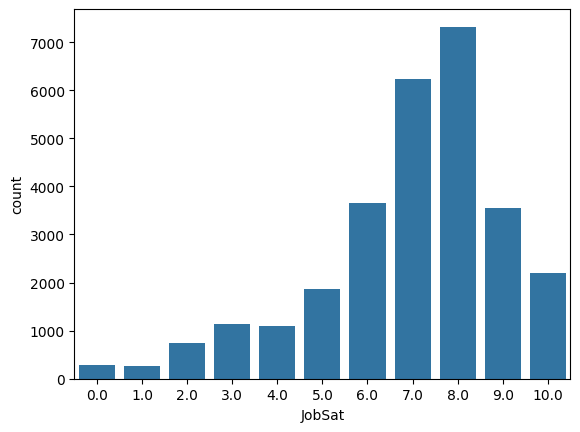

In [6]:
## Write your code here
sns.countplot(data=df, x='JobSat')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


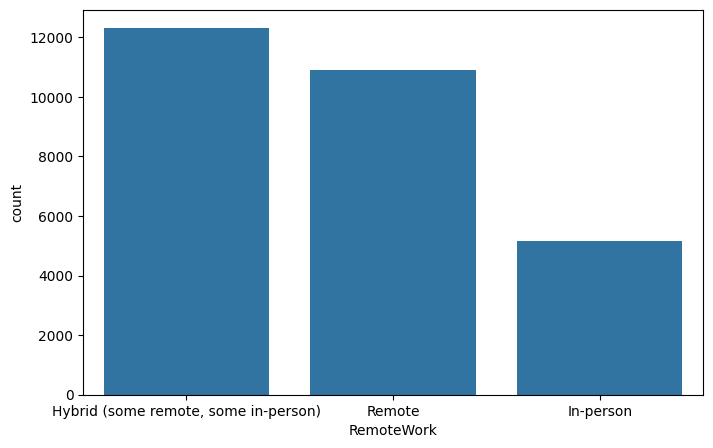

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                        0.602317   
                                       Blockchain                                                 0.160714   
                                       Cloud infrastructure engineer                              0.411348   
                                       Data engineer                                              0.517241   
                                       Data or business analyst                                   0.550633   
...                                                                                                    ...   
Student, part-time;Employed, part-time Scientist                                                  1.000000   
                                       Security professional                                      0.666667   
                                       Student                                                    0.400000   
                                       System administrator                                       0.666667   
All                                                                                               0.434015   

RemoteWork                                                            In-person  \
Employment                             DevType                                    
Employed, full-time                    Academic researcher             0.332046   
                                       Blockchain                      0.142857   
                                       Cloud infrastructure engineer   0.078014   
                                       Data engineer                   0.113027   
                                       Data or business analyst        0.240506   
...                                                                         ...   
Student, part-time;Employed, part-time Scientist                       0.000000   
                                       Security professional           0.333333   
                                       Student                         0.333333   
                                       System administrator            0.333333   
All                                                                    0.181516   

RemoteWork                                                              Remote  
Employment                             DevType                                  
Employed, full-time                    Academic researcher            0.065637  
                                       Blockchain                     0.696429  
                                       Cloud infrastructure engineer  0.510638  
                                       Data engineer                  0.369732  
                                       Data or business analyst       0.208861  
...                                                                        ...  
Student, part-time;Employed, part-time Scientist                      0.000000  
                                       Security professional          0.000000  
                                       Student                        0.266667  
                                       System administrator           0.000000  
All                                                                   0.384469  

[497 rows x 3 columns]

In [7]:
## Write your code here
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork')
plt.show()

crosstab_result = pd.crosstab(
    index=[df['Employment'], df['DevType']],  
    columns=df['RemoteWork'],                 
    margins=True,                              
    normalize='index')
crosstab_result


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


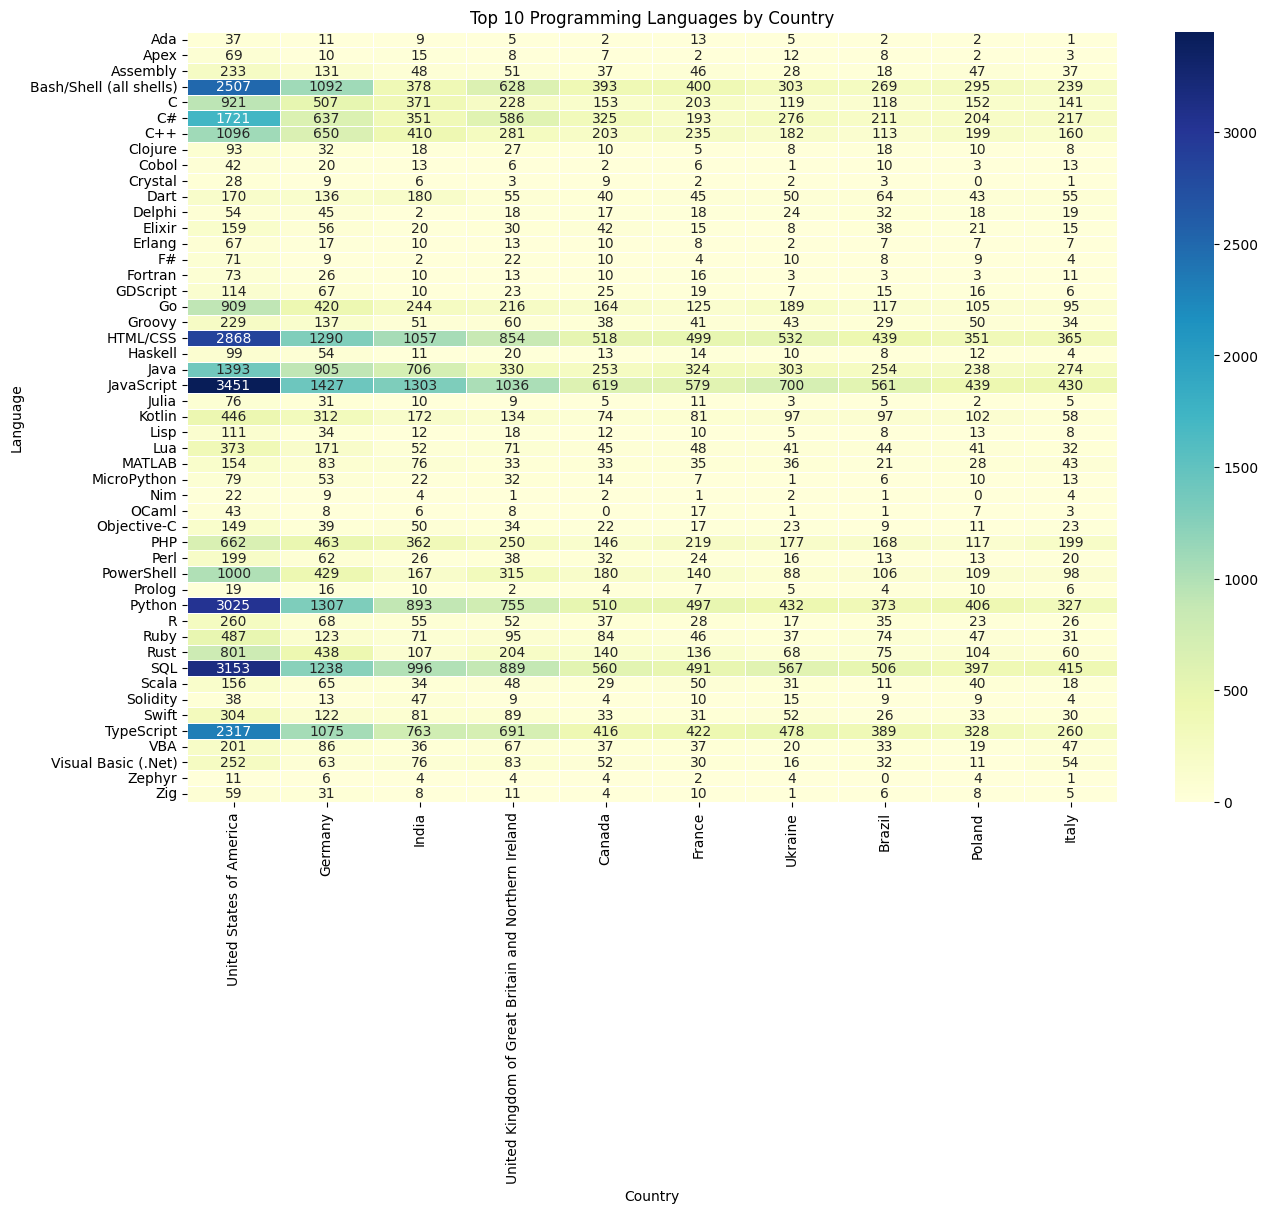

In [8]:
## Write your code here
lang= df[['Country', 'LanguageHaveWorkedWith']].dropna()

lang_exploded= lang.assign(Language= lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
lang_by_country= lang_exploded.groupby(['Country', 'Language']).size().reset_index(name='count')

lang_pivot= lang_by_country.pivot(index='Language' , columns='Country', values='count').fillna(0)
top10_languages= lang_by_country.groupby('Country')['count'].sum().nlargest(10).index
pivot_top10= lang_pivot.loc[:,top10_languages] 


plt.figure(figsize=(15,10))
sns.heatmap(pivot_top10, cmap='YlGnBu',linewidths=0.5,annot=True, fmt='.0f')
plt.xlabel('Country')
plt.ylabel('Language')
plt.title('Top 10 Programming Languages by Country')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


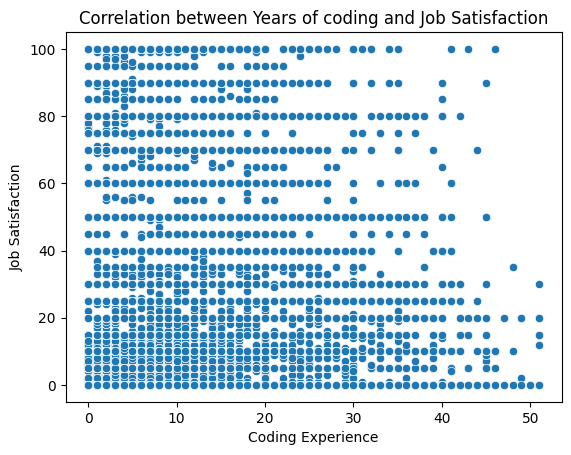

In [9]:
## Write your code here
df[['YearsCodePro', 'JobSatPoints_1']].corr()
sns.scatterplot(data=df, x= 'YearsCodePro' , y='JobSatPoints_1')
plt.title('Correlation between Years of coding and Job Satisfaction')
plt.xlabel('Coding Experience')
plt.ylabel('Job Satisfaction')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


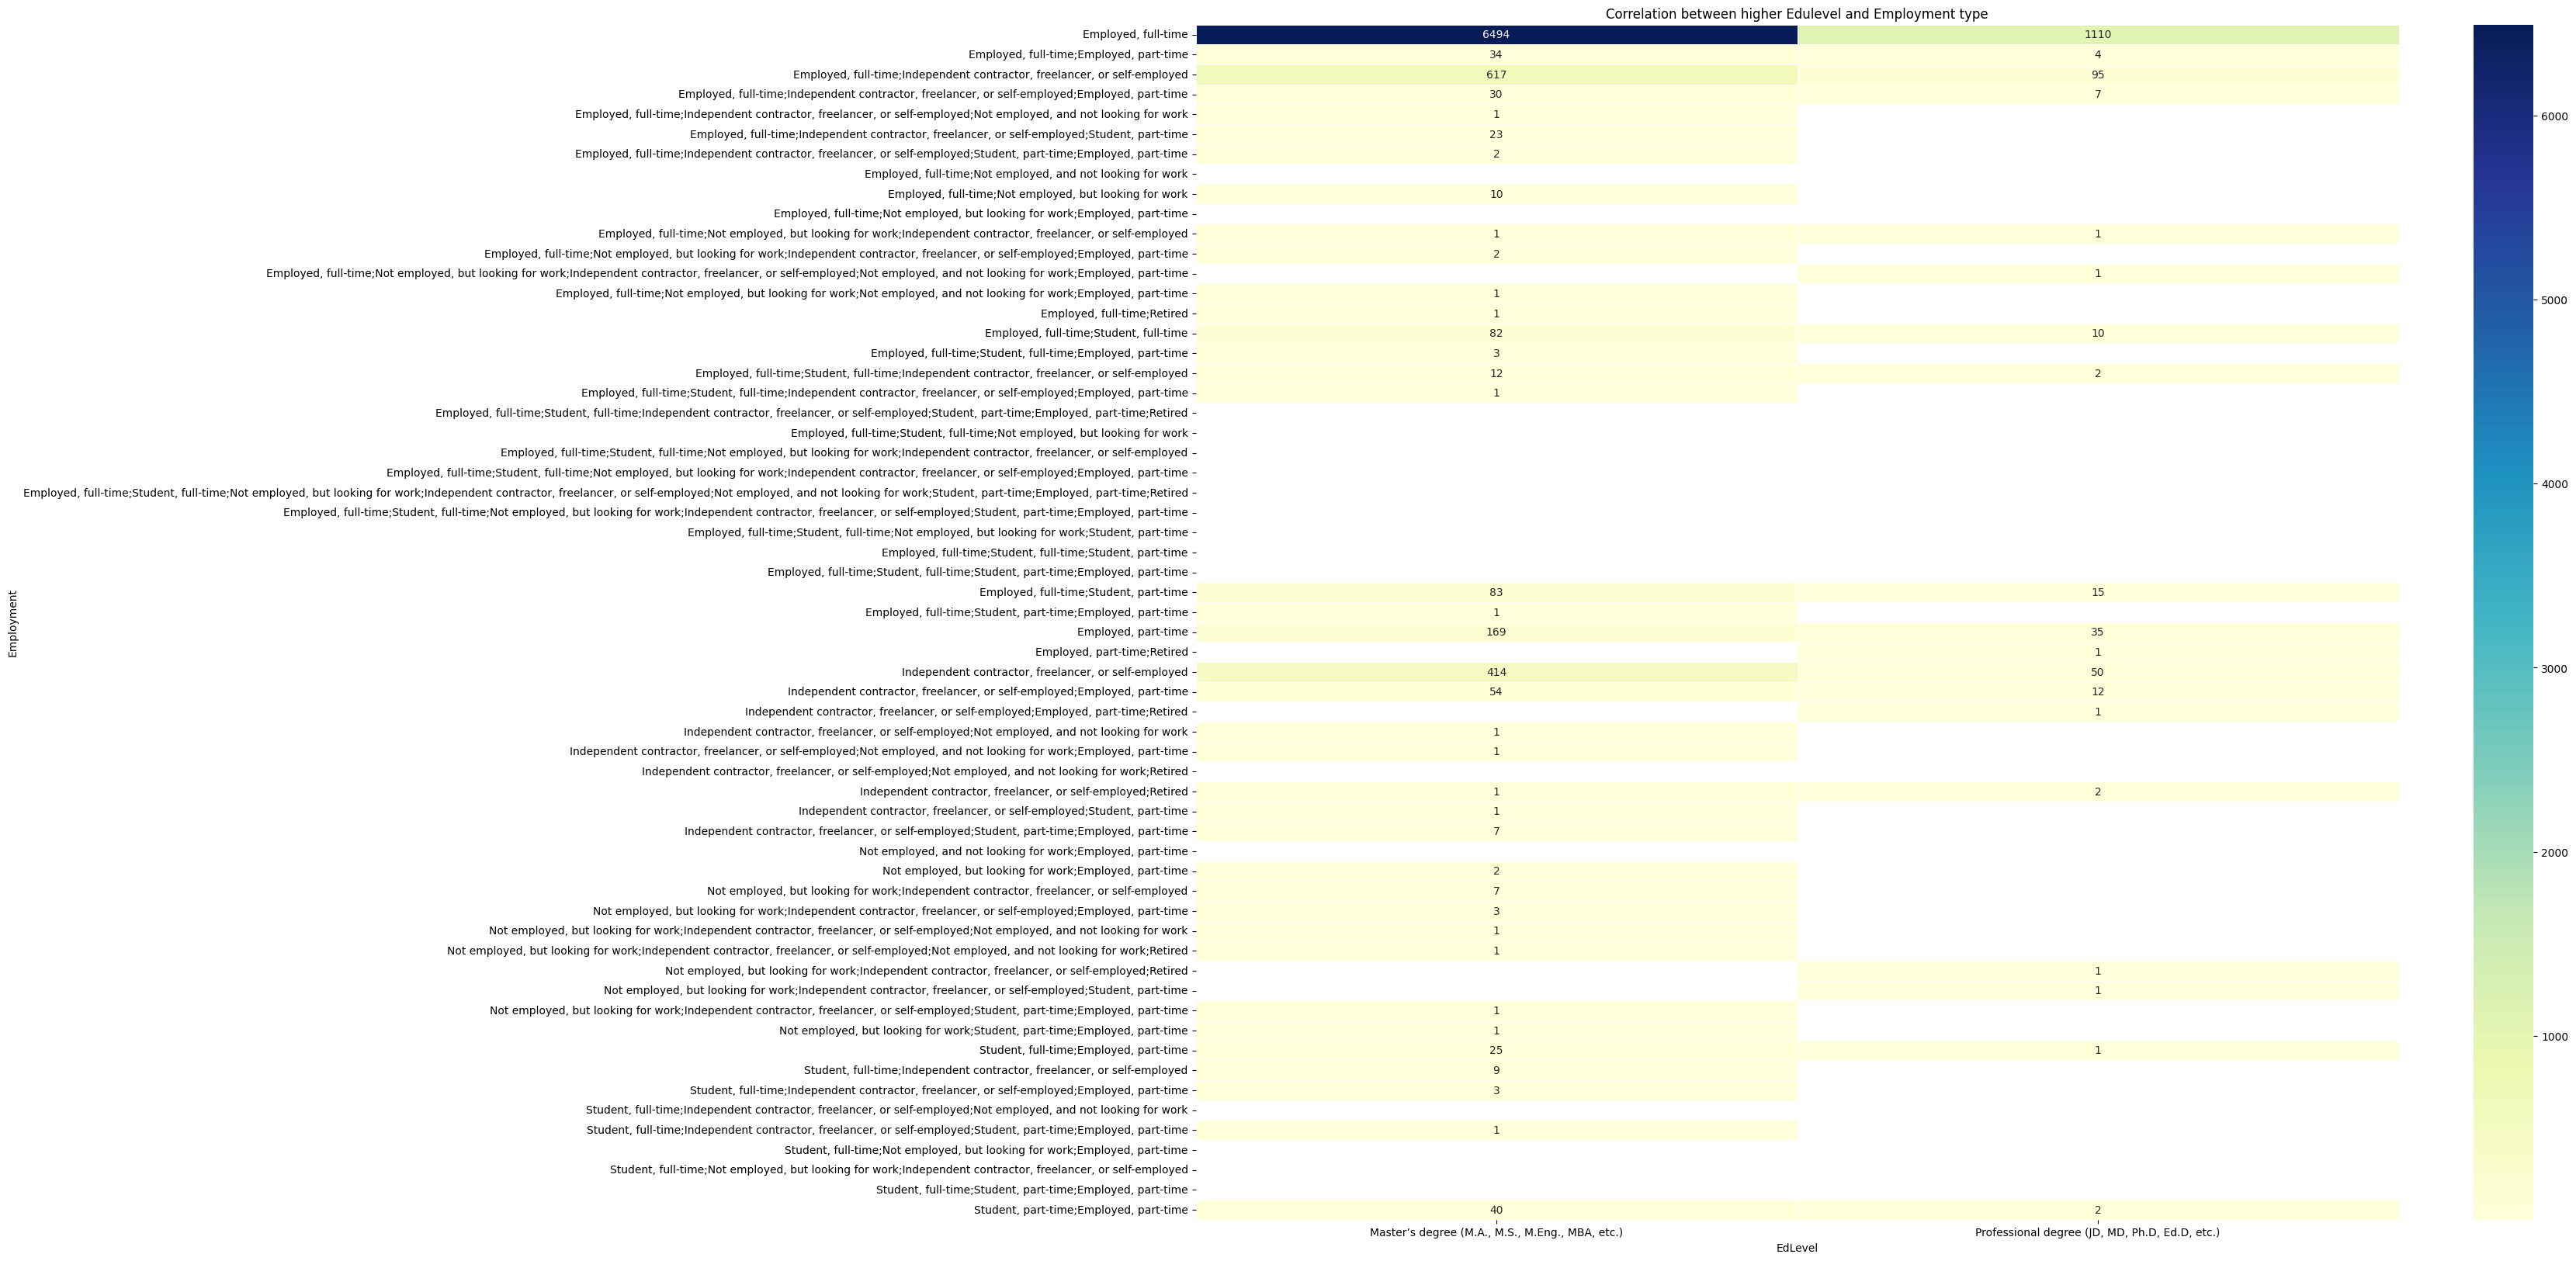

In [10]:
## Write your code here
edlevel= df.groupby(['Employment', 'EdLevel']).size().dropna().reset_index(name='Count')
pivot_table= edlevel.pivot(index='Employment', columns='EdLevel', values='Count')


higher_edu= pivot_table[['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)']]

plt.figure(figsize=(25,20))
sns.heatmap(higher_edu, cmap='YlGnBu',linewidths=0.5,annot=True, fmt='.0f')
plt.title('Correlation between higher Edulevel and Employment type')
plt.show()




#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [11]:
## Write your code here
df.to_csv('modified_df.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
